# <font color="red"> <div align="center"> CLASSIFICATION PROJECT  
    
## <div align="center"> WINE QUALITY


## Contents
1.  Introduction
2.  The Aim of Analysis
3.  General Information of the Data
4.  Data Exploration
5.  Checking for NULL Values 
6.  Filling of the Row Data 
7.  General Looking at Wine Quality Classes
     * 7. 1 Creating 2 Bins Model of Two Types of Wine Quality Classes
8.  Overview about Outliers 
     * 8.1    Winsorization
9.  LOGISTIC REGRESSION CLASSIFIER
     * 9.1    Creating Train / Test Groups with 2 Bins Model 
     * 9.1.a  LogisticRegression
     * 9.1.b  Performance Measurements
     * 9.2    Creating Train / Test Groups with 3 Bins Model
     * 9.2.a  LogisticRegression
     * 9.2.b  Performance Measurements
10.  Imbalanced Data
     * 10.1   Resampling Imbalance Data
     * 10.2   Cross Validation
     * 10.3   K-Fold Cross Validation
     * 10.4   Cross_val_score & Cross_validate 
11. Hyperparameter Tuning
     * 11.1   Grid Search
     * 11.2   RandomizedSearchCV

# <div align="center">  **1. Introduction**

### <font color="gray">The dataset was downloaded from the UCI Machine Learning Repository.

### <font color="gray">The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine

# <div align="center"> **2. The Aim of Analysis**

### <font color="gray"> This study aims to search for the elements which effects WINE QUALITY by using multiclass  decision classification methods such as Support Vector Machines, K-NN, Logistic Regression, Softmax, Confusion Matrix, Accuracy, Precision, Specificity, F1 Score, ROC/AUC, Logarithmic Loss, Cross Validation, K-Fold Cross Validation, Grid Search, SMOTE 

# <div align="center">  **3. General Information of the Data**


### <font color="black">Type:<font color="gray"> Two types of wines such as red wine and white wine.
    
### <font color="black">Fixed acidity:<font color="gray"> Fixed acids include tartaric, malic, citric, and succinic acids which are found in grapes (except succinic)

### <font color="gray">Acids are one of the fundamental properties of wine and contribute greatly to the taste of the wine, Acidity in food and drink tastes tart and zesty. Tasting acidity is also sometimes confused with alcohol. Wines with higher acidity feel lighter-bodied because they come across as “spritzy”. Reducing acids significantly might lead to wines tasting flat. If you prefer a wine that is richer and rounder, you enjoy slightly less acidity.

### <font color="black">Volatile acidity:<font color="gray"> These acids are to be distilled out from the wine before completing the production process. It is primarily constituted of acetic acid though other acids like lactic, formic and butyric acids might also be present. Excess of volatile acids are undesirable and lead to unpleasant flavour.

### <font color="black">Citric acid:<font color="gray"> This is one of the fixed acids which gives a wine its freshness. Usually most of it is consumed during the fermentation process and sometimes it is added separately to give the wine more freshness.

### <font color="black">Residual sugar: <font color="gray">This typically refers to the natural sugar from grapes which remains after the fermentation process stops, or is stopped.

### <font color="black">Chlorides: <font color="gray">Chloride concentration in the wine is influenced by terroir and its highest levels are found in wines coming from countries where irrigation is carried out using salty water or in areas with brackish terrains.

### <font color="black">Free sulfur dioxide:<font color="gray"> This is the part of the sulphur dioxide that when added to a wine is said to be free after the remaining part binds. Winemakers will always try to get the highest proportion of free sulphur to bind. They are also known as sulfites and too much of it is undesirable and gives a pungent odour.

### <font color="black">Total sulfur dioxide:<font color="gray"> This is the sum total of the bound and the free sulfur dioxide. This is mainly added to kill harmful bacteria and preserve quality and freshness. There are usually legal limits for sulfur levels in wines and excess of it can even kill good yeast and give out undesirable odour.

### <font color="black">Density: <font color="gray">This can be represented as a comparison of the weight of a specific volume of wine to an equivalent volume of water. It is generally used as a measure of the conversion of sugar to alcohol. 

### <font color="black">pH: <font color="gray"> Also known as the potential of hydrogen, this is a numeric scale to specify the acidity or basicity the wine. Fixed acidity contributes the most towards the pH of wines. You might know, solutions with a pH less than 7 are acidic, while solutions with a pH greater than 7 are basic. With a pH of 7, pure water is neutral. Most wines have a pH between 2.9 and 3.9 and are therefore acidic.

### <font color="black">Sulphates: <font color="gray">These are mineral salts containing sulfur. Sulphates are to wine as gluten is to food. They are a regular part of the winemaking around the world and are considered essential. They are connected to the fermentation process and affects the wine aroma and flavour. 

### <font color="black">Alcohol: <font color="gray"> It's usually measured in % vol or alcohol by volume (ABV).

### <font color="black">Quality:<font color="gray"> Wine experts graded the wine quality between 0 (very bad) and 10 (very excellent). The eventual quality score is the median of at least three evaluations made by the same wine experts.


# <div align="center"> **4. Data Exploration**

### 0. Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### ***Getting Data***

In [2]:
from subprocess import check_output

print(check_output(["ls", "../input/wine-quality"]).decode("utf8"))

winequalityN.csv



In [3]:
df = pd.read_csv('../input/wine-quality/winequalityN.csv')

#### ***About data***

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


#### ***Switching Column Names into a suitable format***

In [5]:
print(*df.columns, sep='\n')

type
fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality


In [6]:
df.columns = ('type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality')

#### ***First 5 rows***

In [7]:
df.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# <div align="center"> **5. Checking for NULL Values**

#### ***Looking NAN values with heatmap***

In [8]:
import seaborn as sns

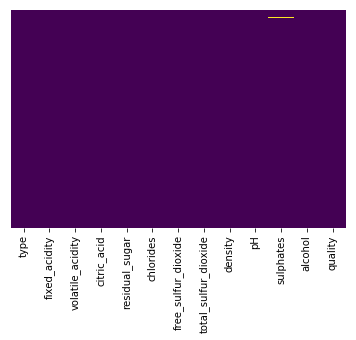

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### ***Checking for NULL Values***

In [10]:
Sum = df.isnull().sum()
Percentage = ( df.isnull().sum()/df.isnull().count())

pd.concat([Sum,Percentage], axis =1, keys= ['Sum', 'Percentage'])

,Sum,Percentage
type,0,0.000000
fixed_acidity,10,0.001539
volatile_acidity,8,0.001231
citric_acid,3,0.000462
residual_sugar,2,0.000308
chlorides,2,0.000308
free_sulfur_dioxide,0,0.000000
total_sulfur_dioxide,0,0.000000
density,0,0.000000
pH,9,0.001385


In [11]:
def null_cell(df): 
    total_missing_values = df.isnull().sum() 
    missing_values_per = df.isnull().sum()/df.isnull().count() 
    null_values = pd.concat([total_missing_values, missing_values_per], axis=1, keys=['total_null', 'total_null_perc']) 
    null_values = null_values.sort_values('total_null', ascending=False) 
    return null_values[null_values['total_null'] > 0] 

# <div align="center"> **6. Filling of the Row Data**

In [12]:
fill_list = (null_cell(df)).index

In [13]:
df_mean = df.copy()

for col in fill_list:
    df_mean.loc[:, col].fillna(df_mean.loc[:, col].mean(), inplace=True)

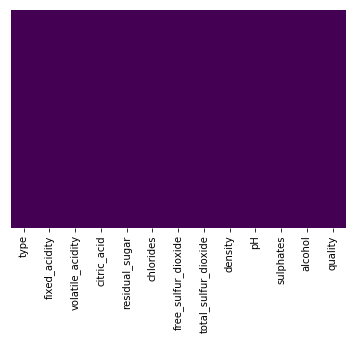

In [14]:
sns.heatmap(df_mean.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
corr_matrix = df_mean.corr()
corr_list = corr_matrix.quality.abs().sort_values(ascending=False).index[0:]

In [16]:
corr_list

Index(['quality', 'alcohol', 'density', 'volatile_acidity', 'chlorides',
       'citric_acid', 'fixed_acidity', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'sulphates', 'residual_sugar', 'pH'],
      dtype='object')

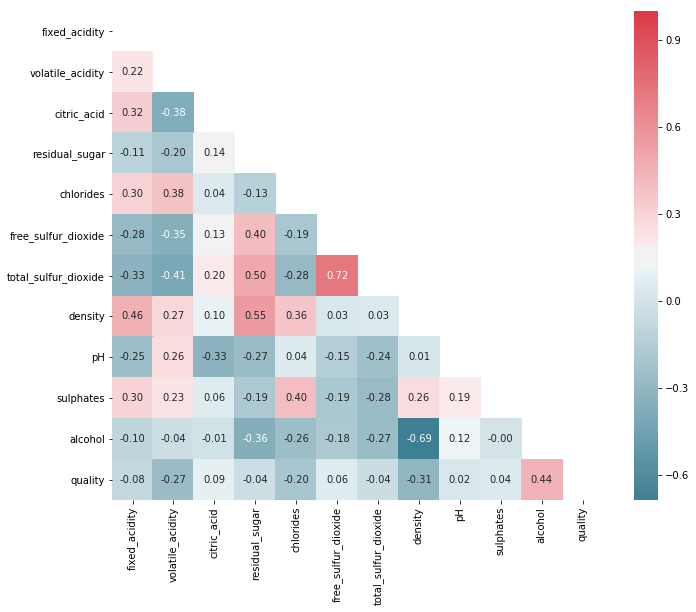

In [17]:
plt.figure(figsize=(11,9))
dropSelf = np.zeros_like(corr_matrix)
dropSelf[np.triu_indices_from(dropSelf)] = True

sns.heatmap(corr_matrix, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)

sns.set(font_scale=1.5)

Wine quality has the highest correlation with alcohol. Other relation degrees are very low with each other,such as citric acid,free_sulfur_dioxide, sulphates and pH.
Quality also has a low negative correlation with density,volatile acidity, chlorides, total_sulfur_dioxide and residual_sugar. 

 #### ***Distribution  of Variables***

In [18]:
from scipy.stats import norm 

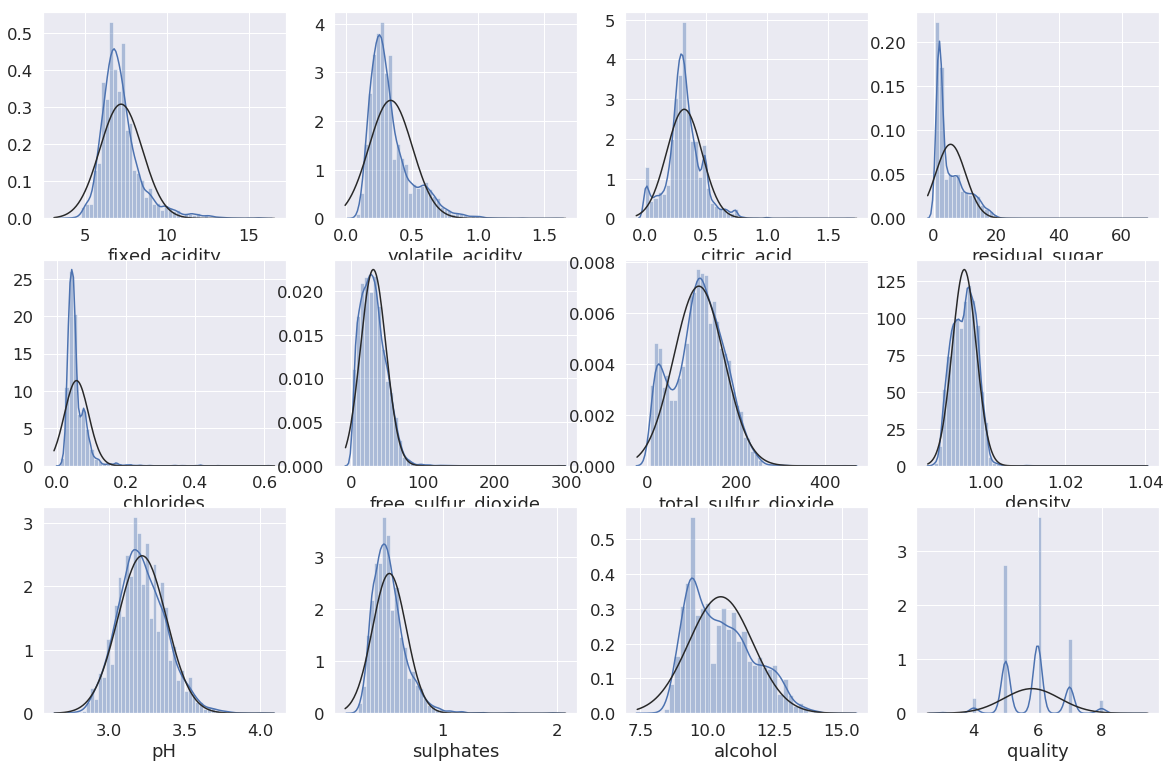

In [19]:
plt.figure(figsize = (20,22))

for i in range(1,13):
    plt.subplot(5,4,i)
    sns.distplot(df_mean[df_mean.columns[i]], fit=norm)
    

# <div align="center"> **7. General Looking at Wine Quality Classes

## <font color="darkblue"> 7. 1 Creating 2 Bins Model of Two Types of Wine Quality Classes

In [20]:
df_bins= df_mean.copy()

In [21]:
bins = [0,5,10]


labels = [0, 1] # 'low'=0, 'high'=1
df_bins['quality_range']= pd.cut(x=df_bins['quality'], bins=bins, labels=labels)

print(df_bins[['quality_range','quality']].head(5))

df_bins = df_bins.drop('quality', axis=1) 

  quality_range  quality
0             1        6
1             1        6
2             1        6
3             1        6
4             1        6


## Quality in  Different Wine Types

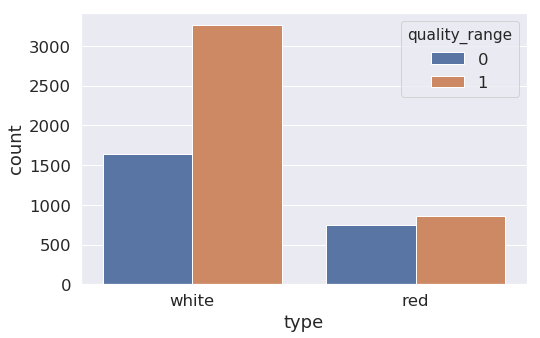

In [22]:
plt.figure(figsize=(8,5))

sns.countplot(x = 'type', hue = 'quality_range', data = df_bins)
plt.show()
# 'low'=0, 'high'=1

As we see on the chart, Low quality red wine has the highest numerical value in data set as well as low quality white wine. 
High quality white and red wines have little place in data. 

## Quality & Alcohol Relation 

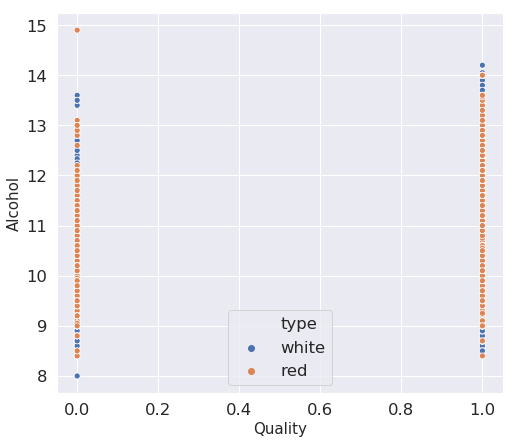

In [23]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='quality_range', 
                y='alcohol', 
                hue='type',
                data=df_bins);
plt.xlabel('Quality',size=15)
plt.ylabel('Alcohol', size =15)
plt.show()

Red and White wines has similar results on the chart. High quality wines are mostly red wines and have more alcohol level.

## Quality & Volatile Acidity by Types

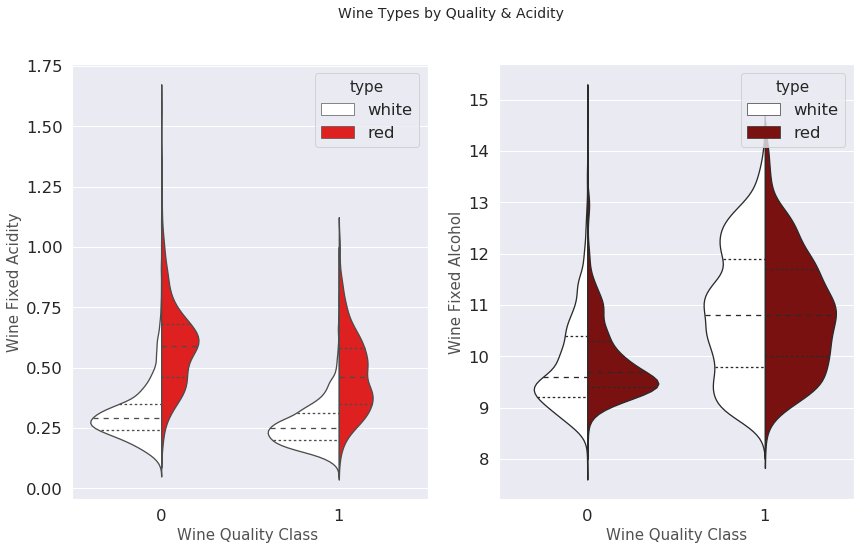

In [24]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))
f.suptitle('Wine Types by Quality & Acidity', fontsize=14)

sns.violinplot(x='quality_range', y='volatile_acidity', hue='type', data=df_bins, split=True, inner='quart', linewidth=1.3,
               palette={'red': 'red', 'white': 'white'}, ax=ax1)
ax1.set_xlabel("Wine Quality Class ",size = 15,alpha=0.8)
ax1.set_ylabel("Wine Fixed Acidity",size = 15,alpha=0.8)

sns.violinplot(x='quality_range', y='alcohol', hue='type', data=df_bins, split=True, inner='quart', linewidth=1.3,
               palette={'red': 'darkred', 'white': 'white'}, ax=ax2)
ax2.set_xlabel("Wine Quality Class",size = 15,alpha=0.8)
ax2.set_ylabel("Wine Fixed Alcohol",size = 15,alpha=0.8)
plt.show()

Fixed acidity level is low in both wine classes, especially in white wine while red wine has more in low quality class up to 1.70.  Fixed alcohol level is again high in red wine class comparing white wine in low quality. High quality class has the highest fixed alcohol level in booth wine classes. 

## Chlorides Level in Quality Classes 

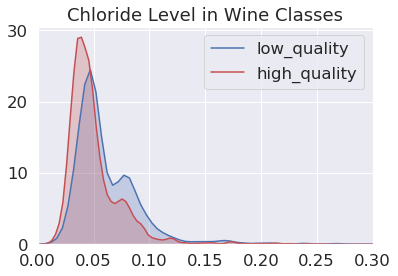

In [25]:
plt.figure(figsize= (6,4))

low_quality = df_bins [df_bins['quality_range']== 0]['chlorides']
high_quality   = df_bins [df_bins['quality_range']== 1][ 'chlorides']
ax = sns.kdeplot(data= low_quality, label= 'low_quality', shade=True, color=None)
ax = sns.kdeplot(data= high_quality,label= 'high_quality',shade=True, color= "r")

plt.title("Chloride Level in Wine Classes")
plt.xlim(0.0,0.3)
plt.legend()
plt.show()

Chloride Level is a bit higher in red wine in contrats with white wine. 

## Fixed Acidity & Volatile Acidity & Citric Acid Density in Quality Classes

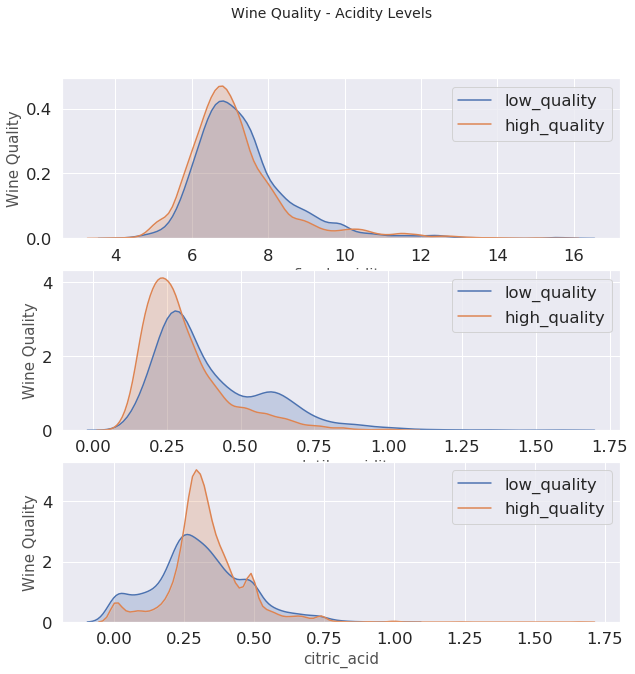

In [26]:
f, (ax1, ax2, ax3) = plt.subplots(3, figsize = (10,10))

f.suptitle('Wine Quality - Acidity Levels', fontsize=14)


fixed_acidity_low_quality    = df_bins [df_bins['quality_range']== 0]['fixed_acidity']
fixed_acidity_high_quality   = df_bins [df_bins['quality_range']== 1]['fixed_acidity']


volatile_acidity_low_quality = df_bins [df_bins['quality_range']== 0]['volatile_acidity']
volatile_acidity_high_quality= df_bins [df_bins['quality_range']== 1]['volatile_acidity']

citric_acid_low_quality      = df_bins [df_bins['quality_range']== 0]['citric_acid']
citric_acid_high_quality     = df_bins [df_bins['quality_range']== 1]['citric_acid']


sns.kdeplot(data=fixed_acidity_low_quality, label="low_quality", shade=True,ax=ax1)
sns.kdeplot(data=fixed_acidity_high_quality, label="high_quality", shade=True, ax=ax1)
ax1.set_xlabel("fixed_acidity",size = 15,alpha=0.8)
ax1.set_ylabel("Wine Quality",size = 15,alpha=0.8)


sns.kdeplot(data=volatile_acidity_low_quality, label="low_quality", shade=True,ax=ax2)
sns.kdeplot(data=volatile_acidity_high_quality, label="high_quality", shade=True, ax=ax2)
ax2.set_xlabel("volatile_acidity",size = 15,alpha=0.8)
ax2.set_ylabel("Wine Quality",size = 15,alpha=0.8)


sns.kdeplot(data=citric_acid_low_quality, label="low_quality", shade=True,ax=ax3)
sns.kdeplot(data=citric_acid_high_quality, label="high_quality", shade=True, ax=ax3)
ax3.set_xlabel("citric_acid",size = 15,alpha=0.8)
ax3.set_ylabel("Wine Quality",size = 15,alpha=0.8)


plt.legend()
plt.show()

## Residual Sugar Levels by Wine Quality Classes

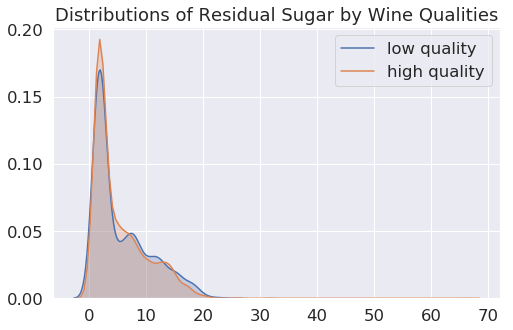

In [27]:
plt.figure(figsize=(8,5))

residual_sugar_low   = df_bins [df_bins['quality_range']== 0]['residual_sugar']
residual_sugar_high  = df_bins [df_bins['quality_range']== 1]['residual_sugar'] 
ax = sns.kdeplot(data= residual_sugar_low, label= 'low quality', shade=True)
ax = sns.kdeplot(data= residual_sugar_high,   label= 'high quality',   shade=True)

plt.title("Distributions of Residual Sugar by Wine Qualities")
plt.legend()
plt.show()

## Sulfur Dioxide Distribution in Wine Quality Classes

Text(0, 0.5, 'free_sulfur_dioxide')

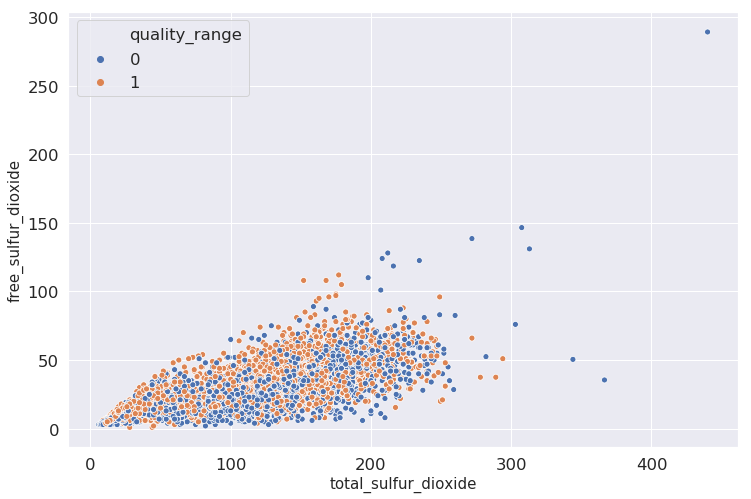

In [28]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='total_sulfur_dioxide', y='free_sulfur_dioxide', hue='quality_range',data=df_bins);
plt.xlabel('total_sulfur_dioxide',size=15)
plt.ylabel('free_sulfur_dioxide', size =15)

There are some extreme values in low quality wine class. Total sulfur dioxide level is getting higher in some low quality wine class while general disturubution is standing up to 100 level of free sulfur dioxide.   

## pH Level in Wine Quality

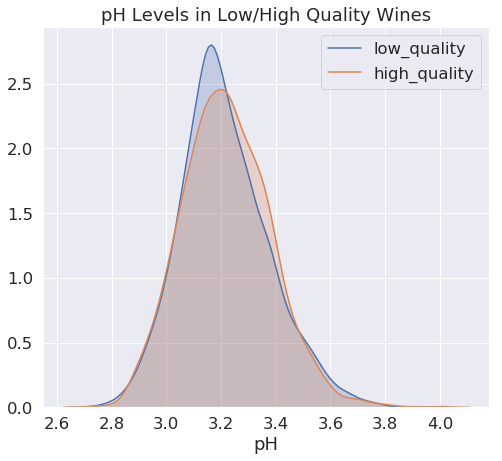

In [29]:
plt.figure(figsize=(8,7))

pH_low_quality  = df_bins [df_bins['quality_range']== 0]['pH']
pH_high_quality = df_bins [df_bins['quality_range']== 1][ 'pH']
ax = sns.kdeplot(data= pH_low_quality, label= 'low_quality', shade=True) 
ax = sns.kdeplot(data= pH_high_quality,label= 'high_quality',   shade=True)

plt.title("pH Levels in Low/High Quality Wines")
plt.xlabel('pH')
plt.legend()
plt.show()

## Density by Wine Quality Classes

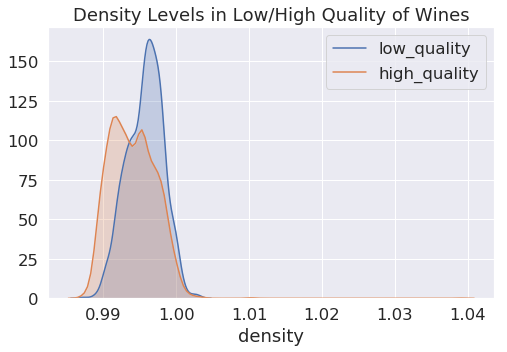

In [30]:
plt.figure(figsize=(8,5))

density_low_quality  = df_bins [df_bins['quality_range']== 0]['density']
density_high_quality = df_bins [df_bins['quality_range']== 1][ 'density']
ax = sns.kdeplot(data= density_low_quality, label= 'low_quality', shade=True) 
ax = sns.kdeplot(data= density_high_quality,label= 'high_quality', shade=True)

plt.title("Density Levels in Low/High Quality of Wines")
plt.xlabel('density')
plt.legend()
plt.show()

## Sulphate Values in Wine Quality Classes

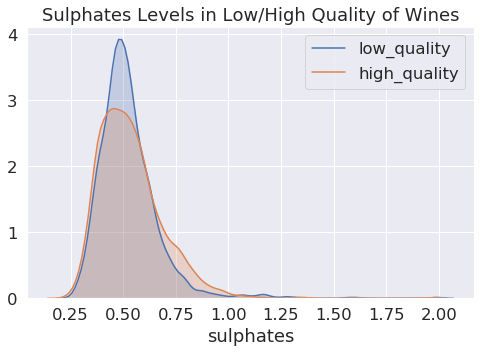

In [31]:
plt.figure(figsize=(8,5))

sulphates_low_quality    = df_mean [df_bins['quality_range']== 0]['sulphates']
sulphates_high_quality   = df_mean [df_bins['quality_range']== 1][ 'sulphates']
ax = sns.kdeplot(data= sulphates_low_quality, label= 'low_quality',  shade=True) 
ax = sns.kdeplot(data= sulphates_high_quality,label= 'high_quality', shade=True)

plt.title("Sulphates Levels in Low/High Quality of Wines")
plt.xlabel('sulphates')
plt.legend()
plt.show()

There is more low quality wine in between 0.4 and 0.6 levels of sulphate levels. Both quality classes have similar values.

# <div align="center">**8.  Overview about Outliers**

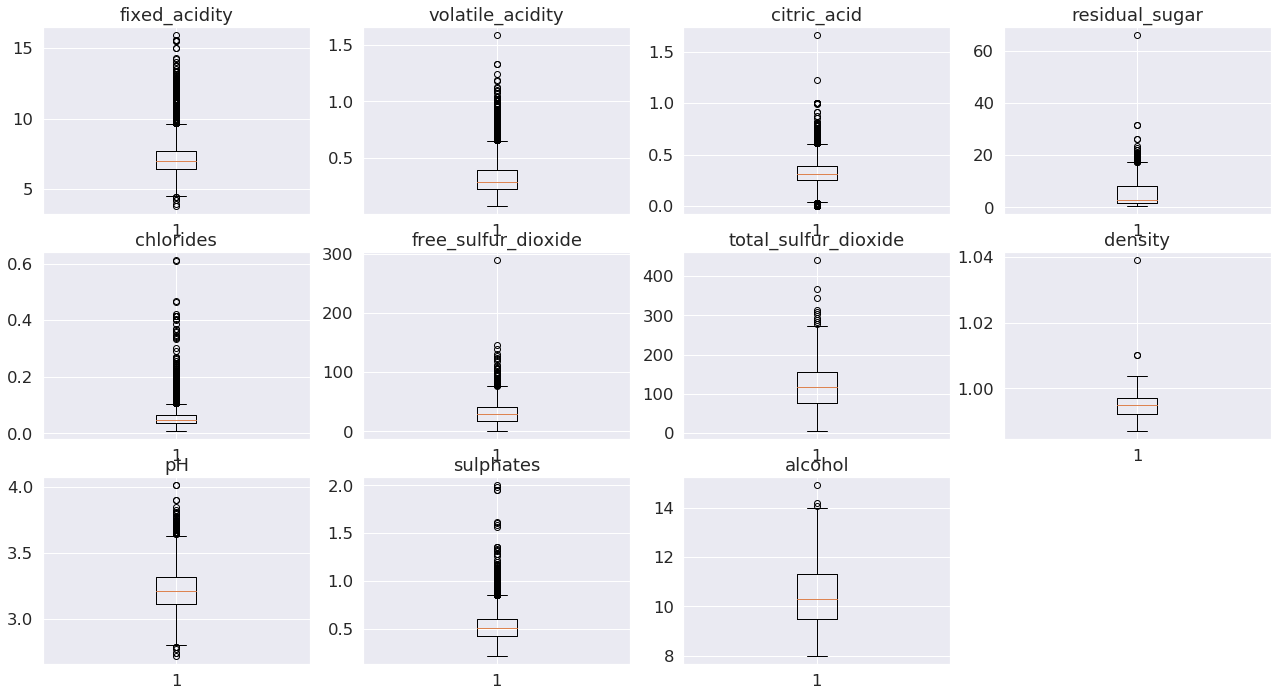

In [32]:
outliers_by_12_variables = ['fixed_acidity', 'volatile_acidity', 'citric_acid',
                            'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
                            'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol'] 
plt.figure(figsize=(22,20))

for i in range(0,11):
    plt.subplot(5, 4, i+1)
    plt.boxplot(df_bins[outliers_by_12_variables[i]])
    plt.title(outliers_by_12_variables[i])

## <font color="darkblue"> 8.1 Winsorization

In [33]:
def winsor(x, multiplier=3): 
    upper= x.median() + x.std()*multiplier
    for limit in np.arange(0.001, 0.20, 0.001):
        if np.max(winsorize(x,(0,limit))) < upper:
            return limit
    return None 

In [34]:
from scipy.stats.mstats import winsorize

kolon_isimleri = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
                                  'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']

for i in range(1,len(kolon_isimleri)):

    df_bins[kolon_isimleri[i]] = winsorize(df_bins[kolon_isimleri[i]], (0, winsor(df_bins[kolon_isimleri[i]])))

# <div align="center">**9. LOGISTIC REGRESSION CLASSIFIER**

## <font color="darkblue"> 9.1 Creating Train / Test Groups with 2 Bins Model 

In order to have all variables in numeric data, I mapped wine types as following by using the previous data frame 'df_bins':

In [35]:
df_bins.type = df_bins.type.map({'white':0, 'red':1})

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [37]:
X = df_bins[['type', 'alcohol', 'density', 'volatile_acidity', 'chlorides',
       'citric_acid', 'fixed_acidity', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'sulphates', 'residual_sugar', 'pH']] 
y = df_bins.quality_range

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)


## <font color="darkblue"> 9.1.a  LogisticRegression

In [38]:
lr = LogisticRegression(random_state=40)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=40, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)
print('One-vs-rest', '-'*35, 
      'Accuracy in Train Group   : {:.2f}'.format(train_accuracy), 
      'Accuracy in Test  Group   : {:.2f}'.format(test_accuracy), sep='\n')

One-vs-rest
-----------------------------------
Accuracy in Train Group   : 0.74
Accuracy in Test  Group   : 0.74


#### Confusion Matrix in Chart

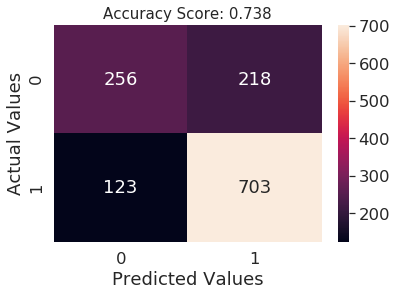

In [40]:
from sklearn.metrics import confusion_matrix as cm

predictions = lr.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [41]:
pred_test  = lr.predict(X_test)
pred_train = lr.predict(X_train)

#### Confusion Matrix in array format

In [42]:
from sklearn.metrics import confusion_matrix 


cm = confusion_matrix(y_test,pred_test)
cm

array([[256, 218],
       [123, 703]])

## <font color="darkblue"> 9.1.b   Performance Measurements

In [43]:
quality_pred = LogisticRegression(random_state=40)
quality_pred.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=40, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
confusion_matrix_train = confusion_matrix(y_train,pred_train)
confusion_matrix_test = confusion_matrix(y_test,pred_test)

print('Confusion Matrix Train Data', '--'*20, confusion_matrix_train, sep='\n')
print('Confusion Matrix Test Data', '--'*20, confusion_matrix_test, sep='\n')

Confusion Matrix Train Data
----------------------------------------
[[1059  851]
 [ 482 2805]]
Confusion Matrix Test Data
----------------------------------------
[[256 218]
 [123 703]]


In [45]:
TN = confusion_matrix_test[0][0]
TP = confusion_matrix_test[1][1]
FP = confusion_matrix_test[0][1]
FN = confusion_matrix_test[1][0]

print("(Total) True Negative       :", TN)
print("(Total) True Positive       :", TP)
print("(Total) Negative Positive   :", FP)
print("(Total) Negative Negative   :", FN)

(Total) True Negative       : 256
(Total) True Positive       : 703
(Total) Negative Positive   : 218
(Total) Negative Negative   : 123


In [46]:
FP+FN 

341

It is better to check FP and FN values for another deep study to focus on false predictions for a better target of accurancy and results.  
A new data set can be created with predictions, X_test and y_test data, than we can check for prediction value of this seperate data set. 

### <font color='dark pink'> Accuracy

In [47]:
from sklearn.metrics import accuracy_score

print("Accuracy Score of Our Model     : ",  quality_pred.score(X_test, y_test))
#print("Accuracy Score of Our Model     : ",  accuracy_score(y_test, pred_test)) # same 

Accuracy Score of Our Model     :  0.7376923076923076


### <font color='dark pink'> Error Rate

In [48]:
Error_Rate = 1- (accuracy_score(y_test, pred_test))  
Error_Rate

0.26230769230769235

### <font color='dark pink'> Precision: Out of all the predicted positive instances, how many were predicted correctly = TP / (TP + FP) ) 


In [49]:
from sklearn.metrics import precision_score

print("precision_score()         : ",  precision_score(y_test, pred_test, average='micro'))

precision_score()         :  0.7376923076923076


### <font color='dark pink'> Recall ( Out of all the positive classes, how many instances were identified correctly = TP / (TP + FN)) 

In [50]:
from sklearn.metrics import recall_score

print("recall_score()            : ",  recall_score(y_test, pred_test, average='micro'))

recall_score()            :  0.7376923076923076


### <font color='dark pink'> Specificity :(TN)/(TN + FP)) 

In [51]:
print(" Specificity Score   : ",  (TN)/(TN + FP)) 

 Specificity Score   :  0.540084388185654


### <font color='dark pink'> F1-Score: From Precision and Recall, F-Measure is computed and used as metrics sometimes. F – Measure is nothing but the harmonic mean of Precision and Recall =(2 * Recall * Precision) / (Recall + Precision) )

In [52]:
from sklearn.metrics import f1_score

precision_s = precision_score(y_test, pred_test,average='micro')
recall_s    = recall_score(y_test, pred_test, average='micro')


print("F1_score     : ",  2*((precision_s*recall_s)/(precision_s + recall_s)))
#print("F1_score     : ",  f1_score(y_test, pred_test,average='micro')) #By formula

F1_score     :  0.7376923076923076


In [53]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test,pred_test))

print("f1_score        : {:.2f}".format(f1_score(y_test, pred_test, average='micro')))
print("recall_score    : {:.2f}".format(recall_score(y_test, pred_test, average='micro')))
print("precision_score : {:.2f}".format(precision_score(y_test, pred_test, average='micro')))

print('\n')
metrics =  precision_recall_fscore_support(y_test, pred_test)
print("Precision       :" , metrics[0]) 
#print("Recall          :" , metrics[1]) 
print("F1 Score        :" , metrics[2]) 

              precision    recall  f1-score   support

           0       0.68      0.54      0.60       474
           1       0.76      0.85      0.80       826

    accuracy                           0.74      1300
   macro avg       0.72      0.70      0.70      1300
weighted avg       0.73      0.74      0.73      1300

f1_score        : 0.74
recall_score    : 0.74
precision_score : 0.74


Precision       : [0.67546174 0.76330076]
F1 Score        : [0.60023447 0.80480824]


### <font color='dark pink'> ROC/AUC(Area Under Curve)

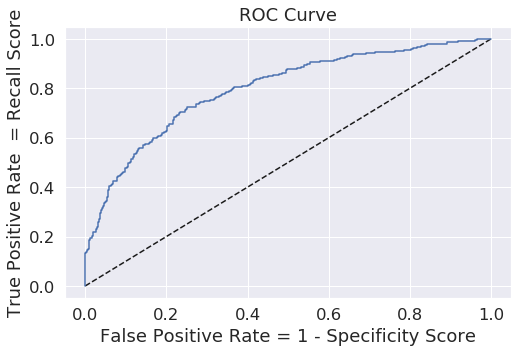

In [54]:
probs = quality_pred.predict_proba(X_test)[:,1]  #Predict probabilities for the test data

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, probs) #Get the ROC Curve


import matplotlib.pyplot as plt


plt.figure(figsize=(8,5))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate = 1 - Specificity Score')
plt.ylabel('True Positive Rate  = Recall Score')
plt.title('ROC Curve')
plt.show()

In [55]:
print('AUC Değeri : ', roc_auc_score(y_test.values, probs))

AUC Değeri :  0.7969754089149068


### <font color='dark pink'>PRECISION RECALL CURVE 
(The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.)

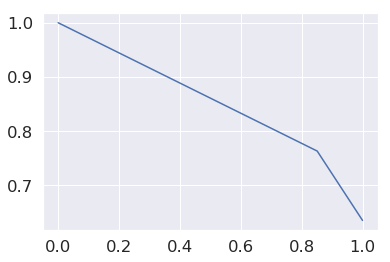

In [56]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, pred_test)

plt.plot(recall, precision)
plt.show()

### <font color='dark pink'> Log Loss (calculating the difference between ground truth and predicted score for every observation and average those errors over all observations. )

In [57]:
from sklearn.metrics import log_loss

print("Log-Loss)    : " , log_loss(y_test.values, probs))
print("Error Rate   : " , 1- accuracy_score(y_test.values, pred_test))

Log-Loss)    :  0.5215473200950209
Error Rate   :  0.26230769230769235


## General Looking at Results

In [58]:
C_values = [0.001,0.01,0.1,1,10,100, 1000]
accuracy_df = pd.DataFrame(columns = ['C_values','Accuracy'])

accuracy_values = pd.DataFrame(columns=['C Value', 'Accuracy Train', 'Accuracy Test'])

for c in C_values:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_train,y_train)
    accuracy_values = accuracy_values.append({'C Value': c,
                                                    'Accuracy Train' : lr.score(X_train, y_train),
                                                    'Accuracy Test': lr.score(X_test, y_test)
                                                    }, ignore_index=True)
display(accuracy_values)

,C Value,Accuracy Train,Accuracy Test
0,0.001,0.658072,0.636154
1,0.010,0.692707,0.670000
2,0.100,0.727920,0.726923
3,1.000,0.743506,0.737692
4,10.000,0.746777,0.742308
5,100.000,0.746777,0.743846
6,1000.000,0.746585,0.744615


# <font color="darkblue">9.2 Creating 3 Bins Models by a large Margin

In [59]:
df_mean.head(1)

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


In [60]:
df_bins3= df_mean.copy()

In [61]:
df_bins3.type = df_bins3.type.map({'white':0, 'red':1})

In [62]:
bins = [0,4,7,10]

labels = [0,1,2] # 'low'=0,'average'=1, 'high'=2

df_bins3['quality_range']= pd.cut(x=df_bins3['quality'], bins=bins, labels=labels)

#df_bins3.type = df_bins3.type.map({'white':0, 'red':1})

print(df_bins3[['quality_range','quality']].head(5))


  quality_range  quality
0             1        6
1             1        6
2             1        6
3             1        6
4             1        6


In [63]:
X = df_bins3[['type', 'alcohol', 'density', 'volatile_acidity', 'chlorides',
       'citric_acid', 'fixed_acidity', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'sulphates', 'residual_sugar', 'pH']]
y = df_bins3.quality_range

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)


In [64]:
X_test.head()

,type,alcohol,density,volatile_acidity,chlorides,citric_acid,fixed_acidity,free_sulfur_dioxide,total_sulfur_dioxide,sulphates,residual_sugar,pH
369,0,11.6,0.99410,0.39,0.044,0.35,7.1,26.0,72.0,0.29,12.5,3.17
6243,1,10.2,0.99613,0.44,0.063,0.24,8.2,10.0,28.0,0.53,2.3,3.25
3374,0,9.5,0.99341,0.19,0.045,0.21,5.9,57.0,135.0,0.44,1.7,3.32
1009,0,10.5,0.99300,0.15,0.055,0.39,8.3,32.0,146.0,0.39,1.3,3.08
220,0,11.0,0.99390,0.27,0.036,0.36,7.5,45.0,164.0,0.33,7.0,3.03


## <font color="darkblue">9.2.a  LogisticRegression

In [65]:
lr    = LogisticRegression(random_state=40)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=40, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)
print('One-vs-rest', '-'*35, 
      'Accuracy Score of Train Model : {:.2f}'.format(train_accuracy), 
      'Accuracy Score of Test  Model : {:.2f}'.format(test_accuracy), sep='\n')

One-vs-rest
-----------------------------------
Accuracy Score of Train Model : 0.93
Accuracy Score of Test  Model : 0.93


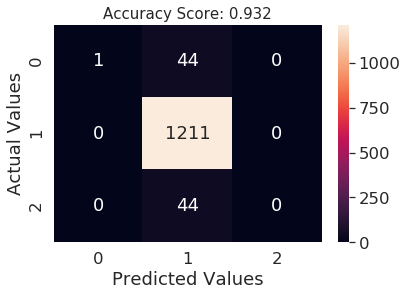

In [67]:
from sklearn.metrics import confusion_matrix as cm

predictions = lr.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [68]:
y_pred = lr.predict(X_test)
y_pred[y_pred == 2]

array([], dtype=int64)

In [69]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[   1,   44,    0],
       [   0, 1211,    0],
       [   0,   44,    0]])

## <font color="darkblue">9.2.b   Performance Measurements

In [70]:
quality_pred = LogisticRegression(random_state=40)
quality_pred.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=40, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
pred_train = lr.predict(X_train)
pred_test  = lr.predict(X_test)

In [72]:
confusion_matrix_train = confusion_matrix(y_train,pred_train)
confusion_matrix_test = confusion_matrix(y_test,pred_test)

print('Confusion Matrix Train Data', '--'*20, confusion_matrix_train, sep='\n')
print('Confusion Matrix Test  Data ', '--'*20, confusion_matrix_test, sep='\n')

Confusion Matrix Train Data
----------------------------------------
[[   2  199    0]
 [   2 4840    0]
 [   0  154    0]]
Confusion Matrix Test  Data 
----------------------------------------
[[   1   44    0]
 [   0 1211    0]
 [   0   44    0]]


In [73]:
#TN = confusion_matrix_test[0][0]
#TP = confusion_matrix_test[1][1]
#FP = confusion_matrix_test[0][1]
#FN = confusion_matrix_test[1][0]

print("(Total) True Negative       :", TN)
print("(Total) True Positive       :", TP)
print("(Total) Negative Positive   :", FP)
print("(Total) Negative Negative   :", FN)

(Total) True Negative       : 256
(Total) True Positive       : 703
(Total) Negative Positive   : 218
(Total) Negative Negative   : 123


### <font color='dark pink'> Accuracy

In [74]:
from sklearn.metrics import accuracy_score

print("Accuracy Score of Test Model : ",  quality_pred.score(X_test, y_test))

Accuracy Score of Test Model :  0.9323076923076923


### <font color='dark pink'> Error Rate

In [75]:
Error_Rate = 1 - (accuracy_score(y_test, pred_test))
Error_Rate

0.06769230769230772

### <font color='dark pink'> Hassasiyet (Precision)

In [76]:
from sklearn.metrics import precision_score

print("precision_score        : ",  precision_score(y_test, pred_test, average='micro'))

precision_score        :  0.9323076923076923


### <font color='dark pink'>  Duyarlılık (Recall/Sensitivity)

In [77]:
from sklearn.metrics import recall_score

print("recall_score        : ",  recall_score(y_test, pred_test, average='micro'))

recall_score        :  0.9323076923076923


### <font color='dark pink'>  F1 (F1 Score)

In [78]:
from sklearn.metrics import f1_score

precision_s = precision_score(y_test, pred_test,average='micro')
recall_s    = recall_score(y_test, pred_test, average='micro')


print("F1_score     : ",  2*((precision_s*recall_s)/(precision_s + recall_s)))# by mathematical formula
print("f1_score()   : ",  f1_score(y_test, pred_test,average='micro'))  #By formula

F1_score     :  0.9323076923076923
f1_score()   :  0.9323076923076923


In [79]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test,pred_test) )

print("f1_score()         : {:.2f}".format(f1_score(y_test, pred_test, average='micro')))
print("recall_score()     : {:.2f}".format(recall_score(y_test, pred_test, average='micro')))
print("precision_score()  : {:.2f}".format(precision_score(y_test, pred_test, average='micro')))

print('\n')
metrikler =  precision_recall_fscore_support(y_test, pred_test)
print("Precision   :" , metrics[0]) 
print("Recall      :" , metrics[1]) 
print("F1 Score    :" , metrics[2]) 

warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

           0       1.00      0.02      0.04        45
           1       0.93      1.00      0.96      1211
           2       0.00      0.00      0.00        44

    accuracy                           0.93      1300
   macro avg       0.64      0.34      0.34      1300
weighted avg       0.90      0.93      0.90      1300

f1_score()         : 0.93
recall_score()     : 0.93
precision_score()  : 0.93


Precision   : [0.67546174 0.76330076]
Recall      : [0.54008439 0.85108959]
F1 Score    : [0.60023447 0.80480824]


In [80]:
from sklearn.preprocessing import LabelBinarizer

In [81]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [82]:
print('AUC Değeri : ', multiclass_roc_auc_score(y_test.values, y_pred))

AUC Değeri :  0.5055763628797337


### <font color='dark pink'> ROC/AUC(Area Under Curve)

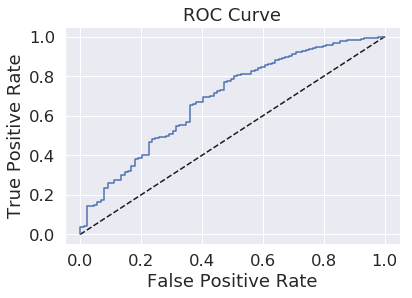

In [83]:
probs = quality_pred.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, probs, pos_label=1)


# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### <font color='dark pink'> PRECISION RECALL CURVE

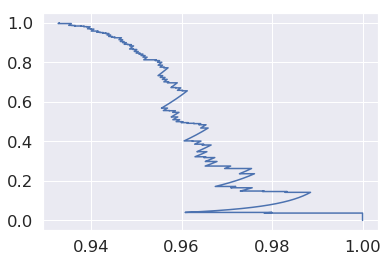

In [84]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, probs, pos_label=1)

plt.plot(precision, recall)
plt.show()

### General Looking at Results 

In [85]:
C_values = [0.001,0.01,0.1,1,10,100, 1000]
accuracy_df = pd.DataFrame(columns = ['C_values','Accuracy'])

accuracy_values = pd.DataFrame(columns=['C Value', 'Accuracy Train', 'Accuracy Test'])

for c in C_values: 
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_train,y_train)
    accuracy_values = accuracy_values.append({'C Value': c,
                                                    'Accuracy Train' : lr.score(X_train, y_train),
                                                    'Accuracy Test': lr.score(X_test, y_test)
                                                    }, ignore_index=True)
display(accuracy_values)

,C Value,Accuracy Train,Accuracy Test
0,0.001,0.931691,0.931538
1,0.010,0.931691,0.931538
2,0.100,0.931691,0.931538
3,1.000,0.931691,0.932308
4,10.000,0.931884,0.933077
5,100.000,0.931884,0.933077
6,1000.000,0.931884,0.933077


# <div align="center">  **10. Imbalanced Data**

In order to see the differency between logistic regression model, I also would like to check resampling imblance data. In previous steps, I added bins in low and high ranges on quality variable, this section will show the results by using resampling method.  

In [86]:
df_mean_imb = df_mean.copy() 

In [87]:
bins = [0,4,10] 


labels = [0, 1] # 'low'=0, 'high'=1 
df_mean_imb['quality_range']= pd.cut(x=df_mean_imb['quality'], bins=bins, labels=labels) 

print(df_mean_imb[['quality_range','quality']].head(5)) 

df_mean_imb = df_mean_imb.drop('quality', axis=1) #

  quality_range  quality
0             1        6
1             1        6
2             1        6
3             1        6
4             1        6


Low Quality  0   : %96.21
High Quality 1   : %3.79


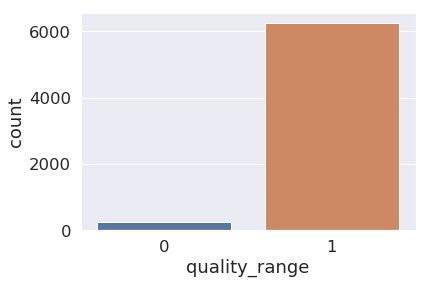

In [88]:
sns.countplot(df_mean_imb.quality_range)
 #'low'=0, 'high'=1
    
print("Low Quality  0   : %{:.2f}".format(sum(df_mean_imb.quality_range)/len(df_mean_imb.quality_range)*100))
print("High Quality 1   : %{:.2f}".format((len(df_mean_imb.quality_range)-sum(df_mean_imb.quality_range))/len(df_mean_imb.quality_range)*100))

When splitting data in two parts starting from four, it gives an imbalanced data. 

In [89]:
balance = (df_mean_imb.quality_range.value_counts()[1]/df_mean_imb.quality_range.shape[0])*100
print('Data Quality Percentage:\n', balance,'%')

Data Quality Percentage:
 96.21363706325997 %


## <font color="darkblue">10.1 Resampling Imbalance Data

In [90]:
from sklearn.utils import resample 
from imblearn.over_sampling import SMOTE 
smote = SMOTE() 

Using TensorFlow backend.


In [91]:
df_mean_imb.type = df_mean_imb.type.map({'white':0, 'red':1}) 

(6497, 12) (6497,)
(12502, 12) (12502,)


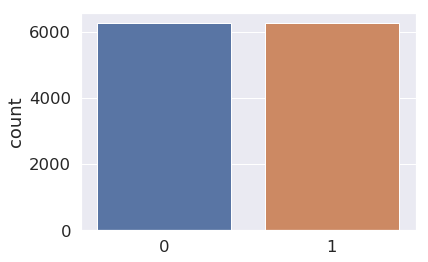

In [92]:
X =  df_mean_imb.drop(['quality_range'], axis=1) 
y =  df_mean_imb.quality_range 

X_sm, y_sm =smote.fit_resample(X,y) 

print(X.shape, y.shape) 
print(X_sm.shape, y_sm.shape) 
sns.countplot(y_sm) 

In [93]:
def create_model(X, y): 
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=40, stratify = y) 
    logreg_model = LogisticRegression() 
    logreg_model.fit(X_train, y_train) 

    pred_train = logreg_model.predict(X_train) 
    pred_test = logreg_model.predict(X_test) 
    confusion_matrix_train = confusion_matrix(y_train, pred_train) 
    confusion_matrix_test = confusion_matrix(y_test, pred_test) 
    print("Accuracy of Test Model : ",  logreg_model.score(X_test, y_test)) 
    print("Train Data Set") 
    print(classification_report(y_train,pred_train) ) 
    print("Test Data Set ") 
    print(classification_report(y_test,pred_test) ) 
    return  None 

In [94]:
create_model(X_sm,y_sm) 
warnings.filterwarnings('ignore')

Accuracy of Test Model :  0.732906837265094
Train Data Set
              precision    recall  f1-score   support

           0       0.76      0.71      0.73      5000
           1       0.73      0.77      0.75      5001

    accuracy                           0.74     10001
   macro avg       0.74      0.74      0.74     10001
weighted avg       0.74      0.74      0.74     10001

Test Data Set 
              precision    recall  f1-score   support

           0       0.75      0.71      0.73      1251
           1       0.72      0.76      0.74      1250

    accuracy                           0.73      2501
   macro avg       0.73      0.73      0.73      2501
weighted avg       0.73      0.73      0.73      2501



## <font color="darkblue">10.2 Cross Validation with 2  Bins Model

In [95]:
df_bins.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_range
0,0,7.0,0.27,0.36,17.2,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [96]:
X = df_bins.drop(['quality_range'], axis=1)
y = df_bins.quality_range
y = np.array(y)

In [97]:
plt.style.use('fivethirtyeight')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print("Number of Rows in    Training dataset :  {} ".format(len(X_train)))
print("Number of Targets in Training dataset :  {} ".format(len(y_train)))
print("Number of Rows in    Test dataset :  {} ".format(len(X_test)))
print("Number of Targets in Test dataset :  {} ".format(len(y_test)))

Number of Rows in    Training dataset :  4547 
Number of Targets in Training dataset :  4547 
Number of Rows in    Test dataset :  1950 
Number of Targets in Test dataset :  1950 


(0, 1000)

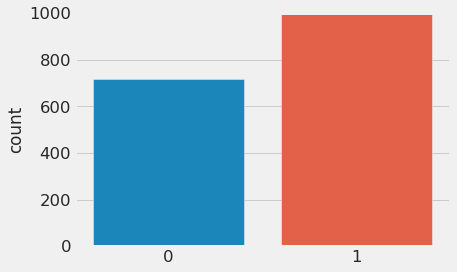

In [98]:
sns.countplot(y_test)
plt.ylim((0,1000))

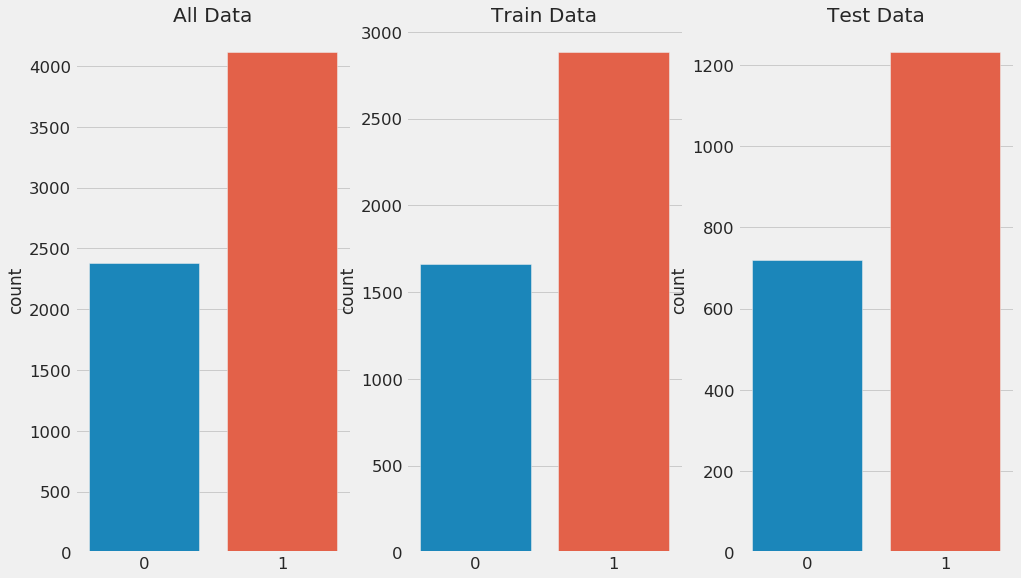

In [99]:
plt.figure(figsize=(15,9))
y_list = [y, y_train, y_test]
titles = ['All Data','Train Data', 'Test Data']

for i in range(1,4):
    plt.subplot(1,3,i)
    sns.countplot(y_list[i-1])
    plt.title(titles[i-1])
    


In [100]:
print("Tüm veri kümesi '0' yüzdesi : %{:.0f} ".format(len(y[y==0])/len(y)*100))
print("Test verisi '0' yüzdesi     : %{:.0f} ".format(len(y_test[y_test==0])/len(y_test)*100))
print("Eğitim verisi '0' yüzdesi   : %{:.0f} ".format(len(y_train[y_train==0])/len(y_train)*100))

Tüm veri kümesi '0' yüzdesi : %37 
Test verisi '0' yüzdesi     : %37 
Eğitim verisi '0' yüzdesi   : %37 


In [101]:
LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
tahmin_eğitim = model.predict(X_train)
tahmin_test = model.predict(X_test)
model.score(X_test, y_test)

0.7425641025641025

We splitted y values equally and trained our model.However, in order to see X values distribution we need following Cross Validation Measurement.

##  <font color="darkblue">10.3 K-Fold Cross Validation

In [102]:
from sklearn.model_selection import KFold 
kf = KFold(n_splits=5, shuffle=True, random_state=40) 

In [103]:
X.loc[[3,5]] 


,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
5,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1


In [104]:
parcalar = kf.split(X)
for num, (train_index, test_index) in enumerate(parcalar): 
    print("{}.Training Set Size : {}".format(num+1,len(train_index)))  
    print("{}.Test Set Size     : {}".format(num+1,len(test_index))) 
    print('-'*26)

1.Training Set Size : 5197
1.Test Set Size     : 1300
--------------------------
2.Training Set Size : 5197
2.Test Set Size     : 1300
--------------------------
3.Training Set Size : 5198
3.Test Set Size     : 1299
--------------------------
4.Training Set Size : 5198
4.Test Set Size     : 1299
--------------------------
5.Training Set Size : 5198
5.Test Set Size     : 1299
--------------------------


In [105]:
from sklearn.metrics import mean_squared_error 

model2 = LogisticRegression()
pieces = kf.split(X)
accuracy_list = []

for i, (egitim_indeks, test_indeks) in enumerate(pieces):
    
    X_train, y_train = X.loc[train_index], y[train_index]
    X_test, y_test = X.loc[test_indeks], y[test_indeks]
    
    model2.fit(X_train, y_train)
    tahmin = model2.predict(X_test)
    accuracy_value = model2.score(X_test, y_test)  
    
    accuracy_list.append(accuracy_value)
    
    print("{}.Accuracy Value of Pieces: {:.3f}".format(i+1, accuracy_value))
    print("-"*30)

1.Accuracy Value of Pieces: 0.737
------------------------------
2.Accuracy Value of Pieces: 0.745
------------------------------
3.Accuracy Value of Pieces: 0.758
------------------------------
4.Accuracy Value of Pieces: 0.736
------------------------------
5.Accuracy Value of Pieces: 0.730
------------------------------


In [106]:
print("Avarage Accuracy Value : {:.2f}".format(np.mean(accuracy_list)))

Avarage Accuracy Value : 0.74


We splited our function in 5 pieces and trained them with Kfold method. In the following section, Cross Validate and Cross Validation Score tools will do everything itself.  

##  <font color="darkblue">10.4   Cross Validation Score & Cross Validate

In [107]:
from sklearn.model_selection import cross_validate, cross_val_score

In [108]:
lrm = LogisticRegression()
cv = cross_validate(estimator=lrm,
                     X=X,
                     y=y,
                     cv=10,return_train_score=True
                    )
print('Test Scores            : ', cv['test_score'], sep = '\n')
print("-"*50)
print('Train Scores           : ', cv['train_score'], sep = '\n')

Test Scores            : 
[0.66513057 0.70814132 0.73886329 0.71538462 0.72727273 0.75346687
 0.73651772 0.82280431 0.64869029 0.77195686]
--------------------------------------------------
Train Scores           : 
[0.75230927 0.74495381 0.74632227 0.74756285 0.74675103 0.74025308
 0.74367305 0.73974008 0.75290698 0.74384405]


In [109]:
print('Mean of Test Set  : ', cv['test_score'].mean())
print('Mean of Train Set : ', cv['train_score'].mean())

Mean of Test Set  :  0.7288228574778601
Mean of Train Set :  0.7458316472908305


The average accuracy score is calculated from 10 different accuracy scores from the model.

We still have similiar accuracy scores (.96-.97) by different methods applied previously. 

In [110]:
cv = cross_validate(estimator=lrm, 
                     X=X,
                     y=y,
                     cv=10,return_train_score=True,
                     scoring = ['accuracy', 'r2', 'precision']
                    )

In [111]:
print('Test Set Accuracy   Mean      : {:.2f}'.format(cv['test_accuracy'].mean()))
print('Test Set R Square   Mean      : {:.2f}'.format(cv['test_r2'].mean()))
print('Test Set Precision  Mean      : {:.2f}'.format(cv['test_precision'].mean()))
print('Train Set Accuracy  Mean      : {:.2f}'.format(cv['train_accuracy'].mean()))
print('Train Set R Square  Mean      : {:.2f}'.format(cv['train_r2'].mean()))
print('Train Set Precision Mean      : {:.2f}'.format(cv['train_precision'].mean()))

Test Set Accuracy   Mean      : 0.73
Test Set R Square   Mean      : -0.17
Test Set Precision  Mean      : 0.77
Train Set Accuracy  Mean      : 0.75
Train Set R Square  Mean      : -0.09
Train Set Precision Mean      : 0.77


In [112]:
cv = cross_val_score(estimator=lrm,
                     X=X,
                     y=y,
                     cv=10                    
                    )
print('Model Scores           : ', cv, sep = '\n')

Model Scores           : 
[0.66513057 0.70814132 0.73886329 0.71538462 0.72727273 0.75346687
 0.73651772 0.82280431 0.64869029 0.77195686]


cross_val_score and cross_validate functions used only test set. In order to have model predictions we can also check cross_val_predict  function.

In [113]:
from sklearn.model_selection import cross_val_predict 

In [114]:
y_pred = cross_val_predict(estimator=lrm, X=X, y=y, cv=10)
print(y_pred[0:10])

[1 0 1 1 1 1 0 1 0 1]


# <div align="center">  **11. Hyperparameter Tuning**

Apart from using appropriate function for our model, using the suitable parameter is also an important detail to have accurate predictions. I will use Grid Search and Random Search for this aim. 

In order to have suitable parametres I used get_params() function. 

In [115]:
logreg = LogisticRegression()
print(logreg.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


##  <font color="darkblue">11.1 Grid Search

In [116]:
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l1', 'l2']
                }

In [117]:
parameters

{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
 'penalty': ['l1', 'l2']}

In [118]:
from sklearn.model_selection import GridSearchCV


grid_cv = GridSearchCV(estimator=logreg,
                       param_grid = parameters,
                       cv = 10
                      )
grid_cv.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [119]:
print("The Best Parametre : ", grid_cv.best_params_)
print("The Best Score     : ", grid_cv.best_score_)

The Best Parametre :  {'C': 100, 'penalty': 'l2'}
The Best Score     :  0.7329536709250424


In [120]:
results = grid_cv.cv_results_
df = pd.DataFrame(results)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006263,0.000690,0.001195,0.000076,1e-05,l1,"{'C': 1e-05, 'penalty': 'l1'}",0.367127,0.367127,0.367127,0.367692,0.366718,0.366718,0.366718,0.366718,0.366718,0.366718,0.366939,0.000311,20
1,0.018212,0.000731,0.001346,0.000085,1e-05,l2,"{'C': 1e-05, 'penalty': 'l2'}",0.640553,0.637481,0.634409,0.633846,0.634823,0.634823,0.633282,0.631741,0.633282,0.633282,0.634755,0.002401,18
2,0.008498,0.000977,0.001174,0.000029,0.0001,l1,"{'C': 0.0001, 'penalty': 'l1'}",0.632873,0.632873,0.632873,0.632308,0.633282,0.633282,0.633282,0.633282,0.633282,0.633282,0.633061,0.000311,19
3,0.023131,0.001112,0.001412,0.000075,0.0001,l2,"{'C': 0.0001, 'penalty': 'l2'}",0.634409,0.648233,0.655914,0.655385,0.644068,0.619414,0.637904,0.617874,0.633282,0.630200,0.637679,0.012689,16
4,0.024371,0.001542,0.001323,0.000058,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",0.639017,0.639017,0.640553,0.640000,0.634823,0.633282,0.636364,0.631741,0.633282,0.633282,0.636140,0.003108,17


In [121]:
df = df[['param_penalty','param_C', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending = False)
df

,param_penalty,param_C,mean_test_score
15,l2,100,0.732954
19,l2,10000,0.732184
14,l1,100,0.731722
13,l2,10,0.731722
12,l1,10,0.731568
18,l1,10000,0.731414
17,l2,1000,0.731414
16,l1,1000,0.731107
10,l1,1,0.730799
11,l2,1,0.728798


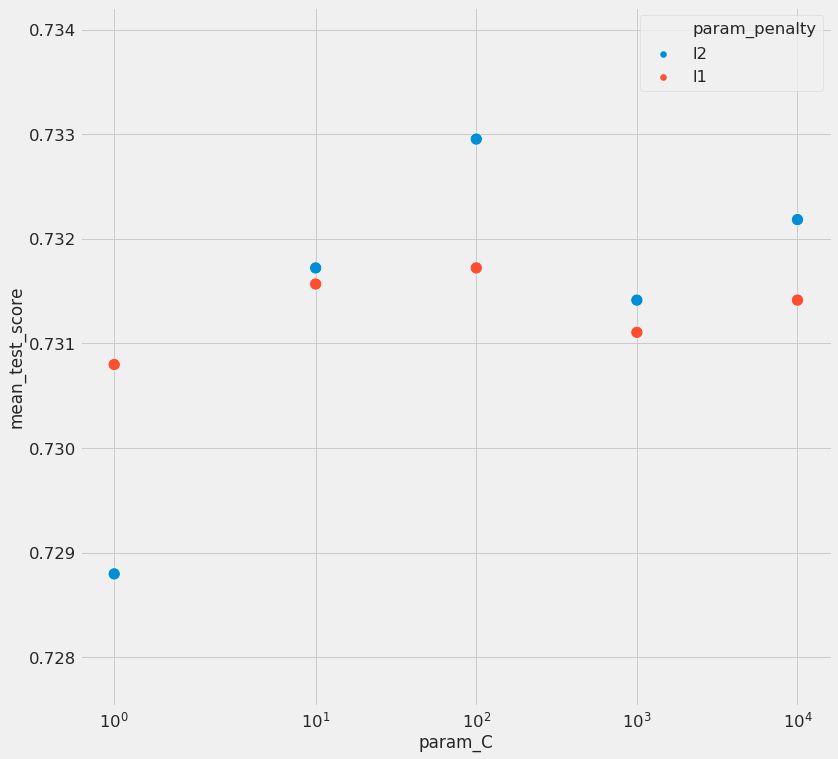

In [122]:
#The most successful 10 parametres on a chart.
plt.style.use('fivethirtyeight')

plt.figure(figsize=(12,12))

sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df[0:10], s=150)

plt.xscale('symlog')
#plt.ylim((0.9,1))
plt.show()

##  <font color="darkblue">11.2 RandomizedSearchCV

While we checked all combinations of our parameters with Grid Search method, we can also use this function with desired number of conbinations of parameters. 

In [123]:
parametres = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l1', 'l2']
                }

I will make 10 combination with 'n_iter' parameter.

In [124]:
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')


rs_cv = RandomizedSearchCV(estimator=logreg,
                           param_distributions = parametres,
                           cv = 10,
                           n_iter = 10,
                           random_state = 111,
                           scoring = 'precision'
                      )
rs_cv.fit(X, y)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                              1, 10, 100, 1000, 10000],
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_sta

In [125]:
print("The Best Parametres        : ", rs_cv.best_params_)
print("All Precisions Values      : ", rs_cv.cv_results_['mean_test_score'])
print("The Best Precision Value   : ", rs_cv.best_score_)

The Best Parametres        :  {'penalty': 'l2', 'C': 1000}
All Precisions Values      :  [0.64100899 0.65846295 0.77478449 0.77204202 0.77565615 0.77613819
 0.68097747 0.6360135  0.77527805 0.        ]
The Best Precision Value   :  0.7761381852193342


In [126]:
results_rs = rs_cv.cv_results_
df_rs = pd.DataFrame(results_rs)

In [127]:
results_rs = rs_cv.cv_results_
df_rs = pd.DataFrame(results_rs)
df_rs = df_rs[['param_penalty','param_C', 'mean_test_score']]
df_rs = df_rs.sort_values(by='mean_test_score', ascending = False)
df_rs

,param_penalty,param_C,mean_test_score
5,l2,1000,0.776138
4,l1,100,0.775656
8,l1,1000,0.775278
2,l2,10,0.774784
3,l2,1,0.772042
6,l1,0.01,0.680977
1,l2,0.001,0.658463
0,l2,0.0001,0.641009
7,l1,0.001,0.636014
9,l1,1e-05,0.000000


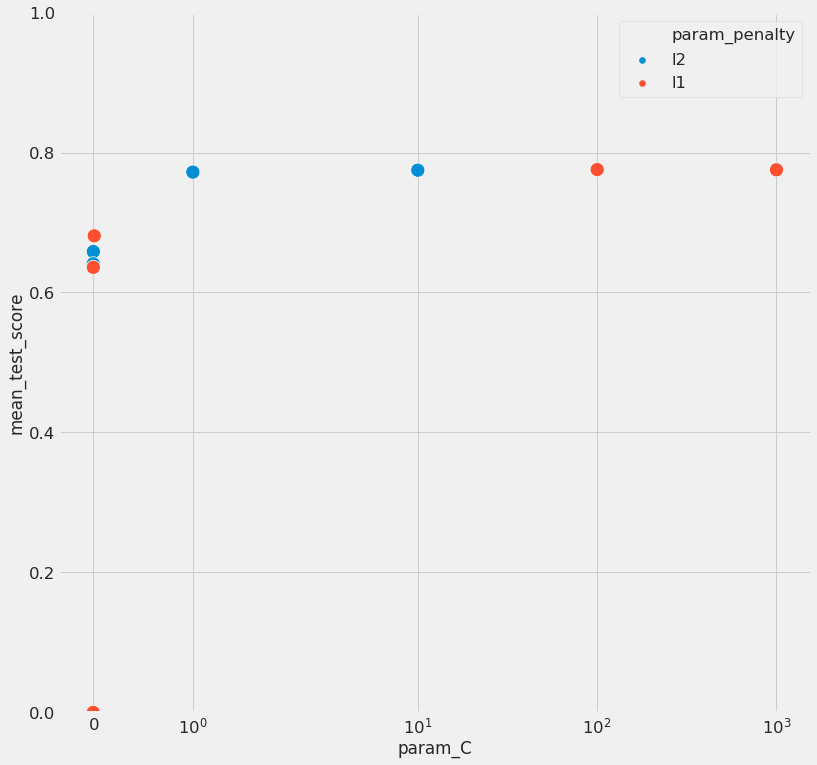

In [128]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,12))
sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df_rs, s=200)
plt.xscale('symlog')
plt.ylim((0.0,1))
plt.show()



In the beginning of this study, I checked general characteristic of the data set. Data has some NULL values. Even though, dropping missing values is still an option due to low percentage of missing values in data, I preferred to filled them by the mean of data. 

Data set shows that red wine is very reach in wine quality with a high correlation with alcohol. 

I also looked at quality levels in each variable by using suitable charts for a general understanding.  

Following sections, I searched for 2 different types of models with different bins. Behind this study I created many models for a better accuracy and recall scores. This study only shows the best model with good scores and predictions.

The first model was included 2 bins with all variables in a quality range of 0-5,5-10. This model gives %0.74 accuracy score on train and test samples. 

df_bins3 data frame was split in 3 different bins to check accuracy levels. First bin was between 0-5,5-6,6-10 range. This model gives score of %0.58.  

On the other hand, when bins are arranged by following 0-4,4-7,7-10; score reached 0.93%. I continued with this model for the further steps on other performance measurements. 

A general note: These results for imbalance data, thus I would like to see scores after balancing data set. Due to this reason, and to check the difference between logistic regression model, I resampled imbalance data. In previous steps, I added bins in low and high ranges on quality variable, this section will show the results by using resampling method.
However, having very high scores and a negative R square show that data set needs another approach at the end. For further studies, more suitable data set can be chosen. 

A Quick Note for Resampling Data: Splitting data in 2 parts from 0 to 5 gives a balance distribution. However, when we split data  from 0 to 4 in the first bin, I got an imbalance data. 
After resampling our data, I needed to switch y values in array format to have Cross Validation scores. 

Generally, our measurements and model scores worked well to show the aim of the study. This study can be completed in a shorter way as well without repeating similar functions; however, this study also aims to use different methods to have accurate scores from variable sources. 

I focused on classification methods on this study. However, I agree that other algorithms can be more successful such as Random forest and Boosting algorithms give better results. I will use these methods in my next kernel.
